# **1. Introduction to Logistic Regression** <a class="anchor" id="1"></a>


When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

`Logistic Regression works on Binary Classification data. Uses Sigmoid Function and only gets the values between 0 and 1 in 
the form of probabilities and rest of tasks is performed like linear regression`

**Logsitic Regression helsps to find out the relationship between 2 variables (categrorical) , then bases on this relationship it helps us to predict the outcome of either one of the variable based on the other.**

`For example`: **Lets say we want to guess the whether the customer will click the buy button on a shopping website or Not. Then logistic regression by using various factors like past behaviors of Cx, buying season, time spent, price factor etc.. like these we can predict wther the buys or not.**

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

`Logistic regression vs. linear regression`
>Linear regression predicts a continuous dependent variable by using a given set of independent variables. A continuous variable can have a range of values, such as price or age. So linear regression can predict actual values of the dependent variable. It can answer questions like "What will the price of rice be after 10 years?"

**Unlike linear regression, logistic regression is a classification algorithm. It cannot predict actual values for continuous data. It can answer questions like "Will the price of rice increase by 50% in 10 years?"**

linear regression $ y=mx+c $

Logistic Regression 
$$y = \frac{1}{1 + e^{-x}}$$


<a class="anchor" id="0"></a>
# **Logistic Regression Classifier**


Hello friends,


In this kernel, I implement Logistic Regression with Python and Scikit-Learn. I build a Logistic Regression classifier to predict whether or not Customer will buy the Loan scheme. I train a binary classification model using Logistic Regression. 

## Problem Statement:

**The above data consist of the past data of customers that has been given by bank.
Now the bank official wants to launch a plan or scheme for the customers, now being our client the officials wants us to create a model that will predict if the upcomming customers will be interested in the schemes or not**

`Here Target column is df[y] i.e. customers who have taken the loan scheme`
* yes - interested in scheme, 
* No - not interested in shcemme

### Import libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1)
# sns.set_style('white')
sns.set_palette('deep')

### Import dataset

In [47]:
df=pd.read_csv('bank-additional-full_final (1).csv',sep=";")
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory data analysis

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

### Removing null rows

In [49]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Removing duplicate rows

In [50]:
df.duplicated().sum()


13

In [51]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Checking for outliers in each columns

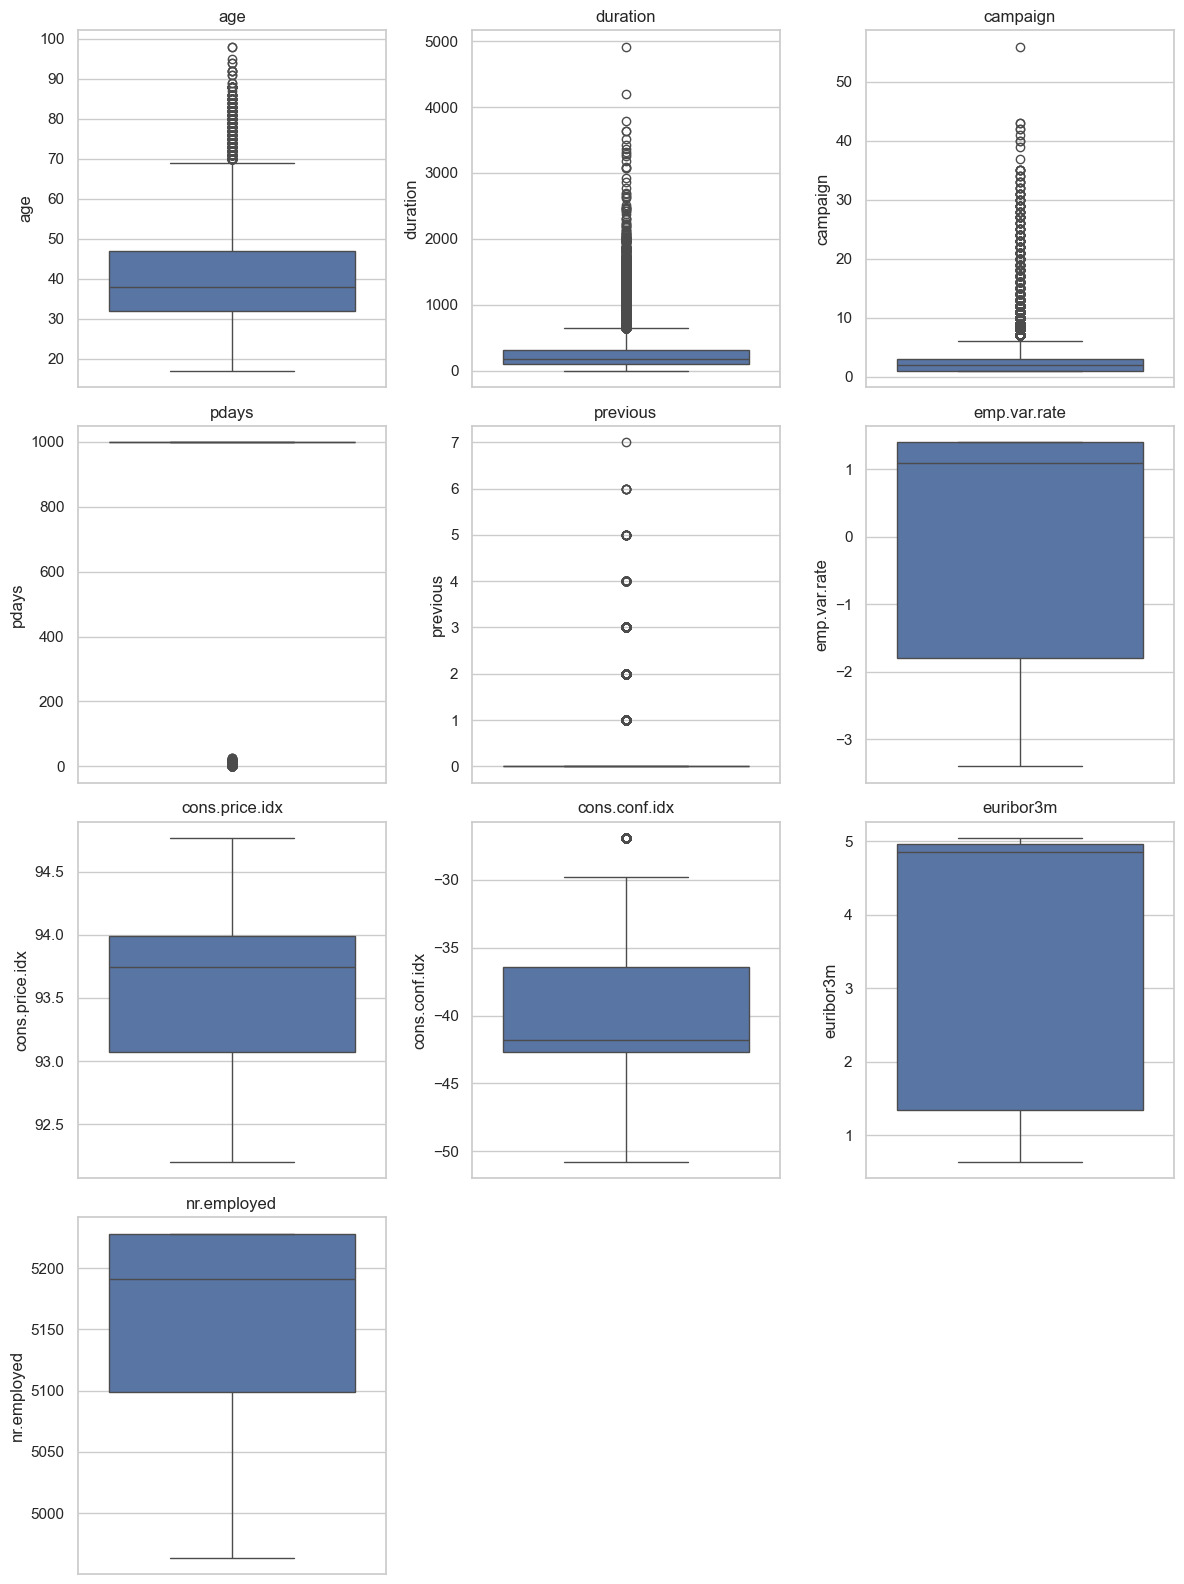

In [52]:
numeric_cols=df.select_dtypes(include='number').columns
num_cols=len(numeric_cols)
ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=df[col],ax=ax)
    ax.set_title(col)

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

**Whenever there is no box for any of the boxplot we should Never consider that for outliers because there might be less values in that column.
`for example ` here in pdays we can see that 999.0 value has 39662 times occurance**

In [53]:
df['pdays'].value_counts()

pdays
999.0    39662
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: count, dtype: int64

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Removing outliers

In [55]:
outlier_cols=['age','duration','campaign','cons.conf.idx']

for col in outlier_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    
    iqr=q3-q1
    lower_limit=q1-(iqr*1.5)
    upper_limit=q3+(iqr*1.5)
    
    df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


#### Rechecking now outliers

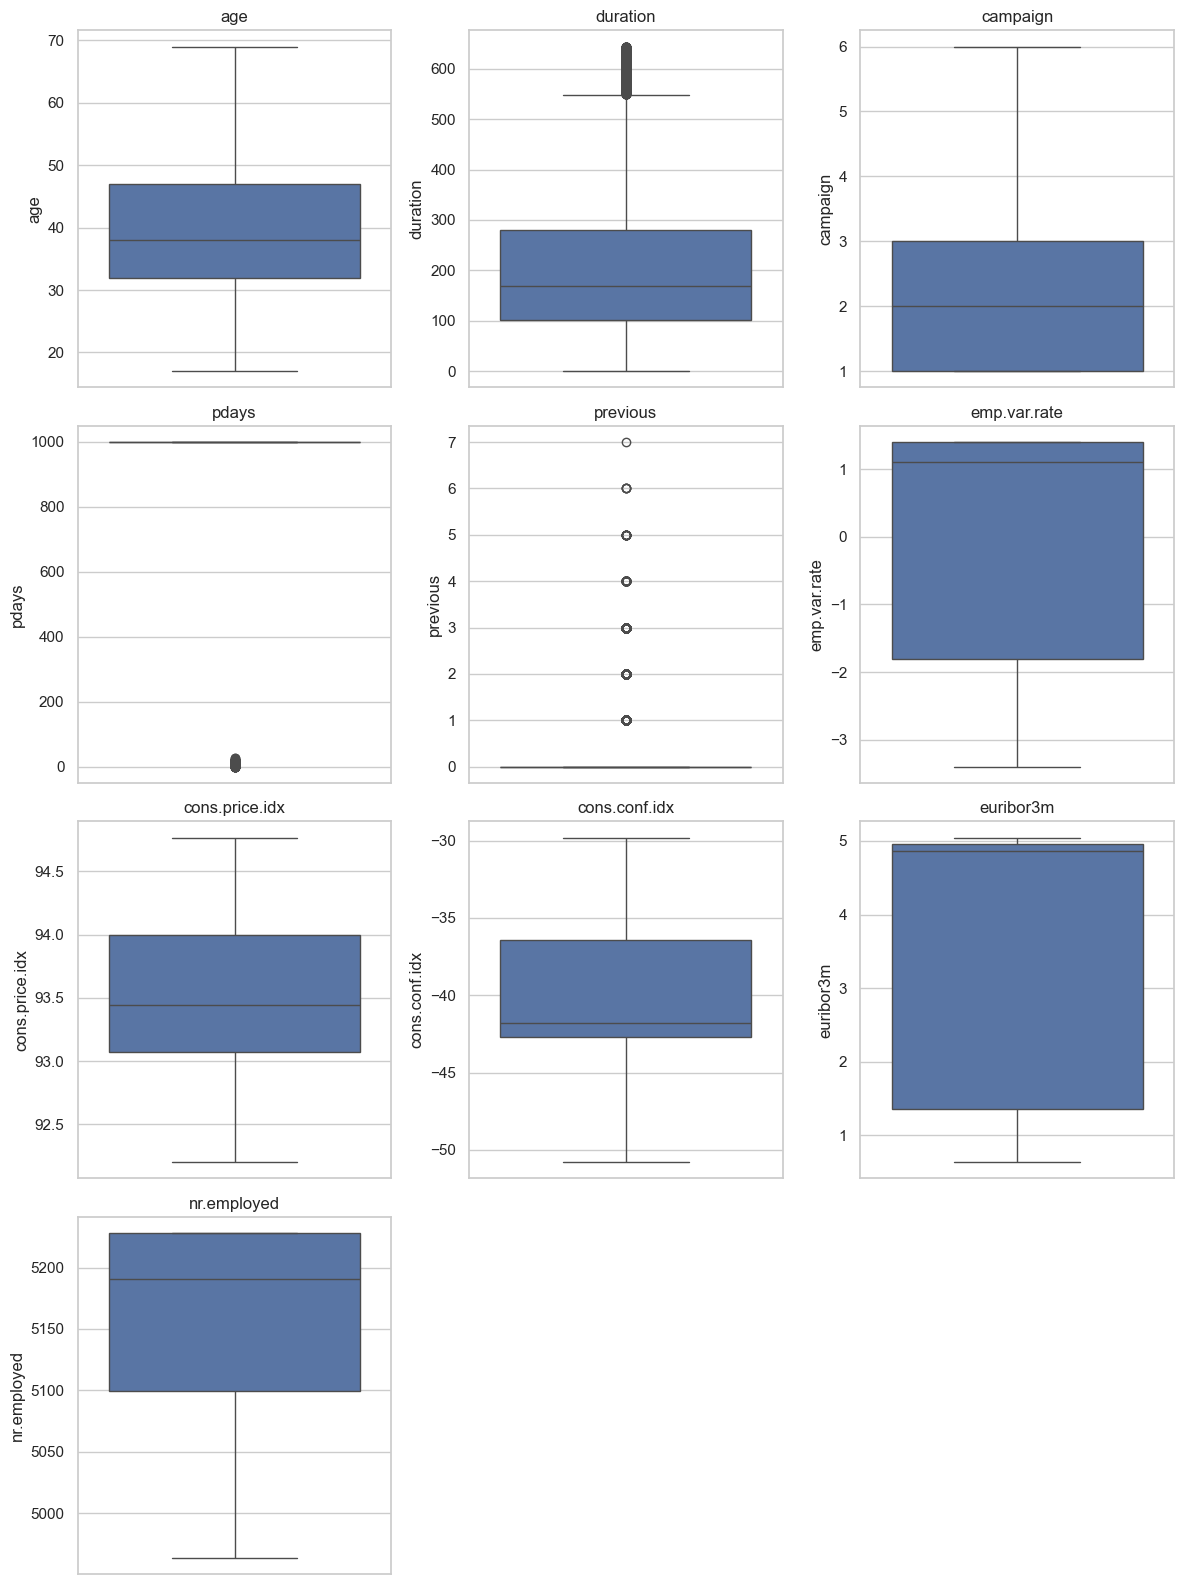

In [56]:
numeric_cols=df.select_dtypes(include='number').columns
num_cols=len(numeric_cols)
ncols=3
nrows=(num_cols+ncols-1)//ncols

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(ncols*4,nrows*4))
axes=axes.flatten()

for ax,col in zip(axes,numeric_cols):
    sns.boxplot(y=df[col],ax=ax)
    ax.set_title(col)

for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

now we can see that in columns `['age','duration','campaign','cons.conf.idx']` most of the outliers have been excluded

#### Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder



In [58]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [59]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col].astype(str))
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


### **Feature Selection **

In [60]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.016762,-0.391334,-0.100854,0.191739,-0.005664,-0.005349,0.034921,-0.033203,-0.026799,...,0.012643,0.004257,-0.023142,0.018999,0.076681,0.041054,0.102274,0.088340,0.074006,-0.018263
job,-0.016762,1.000000,0.031943,0.142220,-0.031415,0.007615,-0.012510,-0.021930,-0.036545,0.000419,...,-0.009055,-0.026189,0.019105,0.010587,-0.000470,-0.008488,0.046472,-0.001156,-0.012086,0.023598
marital,-0.391334,0.031943,1.000000,0.106358,-0.083082,0.013370,0.005186,-0.064230,-0.012568,0.006159,...,-0.010908,-0.048035,0.048145,0.004515,-0.099130,-0.063965,-0.033756,-0.107473,-0.105750,0.064662
education,-0.100854,0.142220,0.106358,1.000000,-0.193624,0.013672,0.003972,-0.111465,-0.088087,-0.020234,...,-0.001028,-0.055519,0.043654,0.020334,-0.057126,-0.088639,0.085989,-0.049623,-0.057861,0.084367
default,0.191739,-0.031415,-0.083082,-0.193624,1.000000,-0.013665,0.000383,0.130619,-0.012913,-0.006132,...,0.023958,0.082030,-0.102442,0.022574,0.200101,0.161069,0.045235,0.191706,0.187036,-0.112272
housing,-0.005664,0.007615,0.013370,0.013672,-0.013665,1.000000,0.043047,-0.083344,-0.020588,0.001342,...,-0.009600,-0.007528,0.021192,-0.013932,-0.059711,-0.079804,-0.036152,-0.058325,-0.044891,0.014969
loan,-0.005349,-0.012510,0.005186,0.003972,0.000383,0.043047,1.000000,-0.006644,-0.002576,-0.010463,...,0.012337,-0.000353,0.000965,-0.003562,0.000100,-0.001680,-0.009488,-0.002251,0.000333,-0.007222
contact,0.034921,-0.021930,-0.064230,-0.111465,0.130619,-0.083344,-0.006644,1.000000,0.292769,-0.007871,...,0.043546,0.115705,-0.214777,0.126459,0.399120,0.604001,0.294017,0.402306,0.264713,-0.145123
month,-0.033203,-0.036545,-0.012568,-0.088087,-0.012913,-0.020588,-0.002576,0.292769,1.000000,0.036260,...,-0.033956,-0.032965,0.092854,-0.069198,-0.137305,0.034687,-0.046225,-0.080570,-0.182957,-0.022339
day_of_week,-0.026799,0.000419,0.006159,-0.020234,-0.006132,0.001342,-0.010463,-0.007871,0.036260,1.000000,...,-0.052079,-0.010495,-0.002972,0.018543,0.034629,0.006197,0.041691,0.040746,0.030968,0.013190


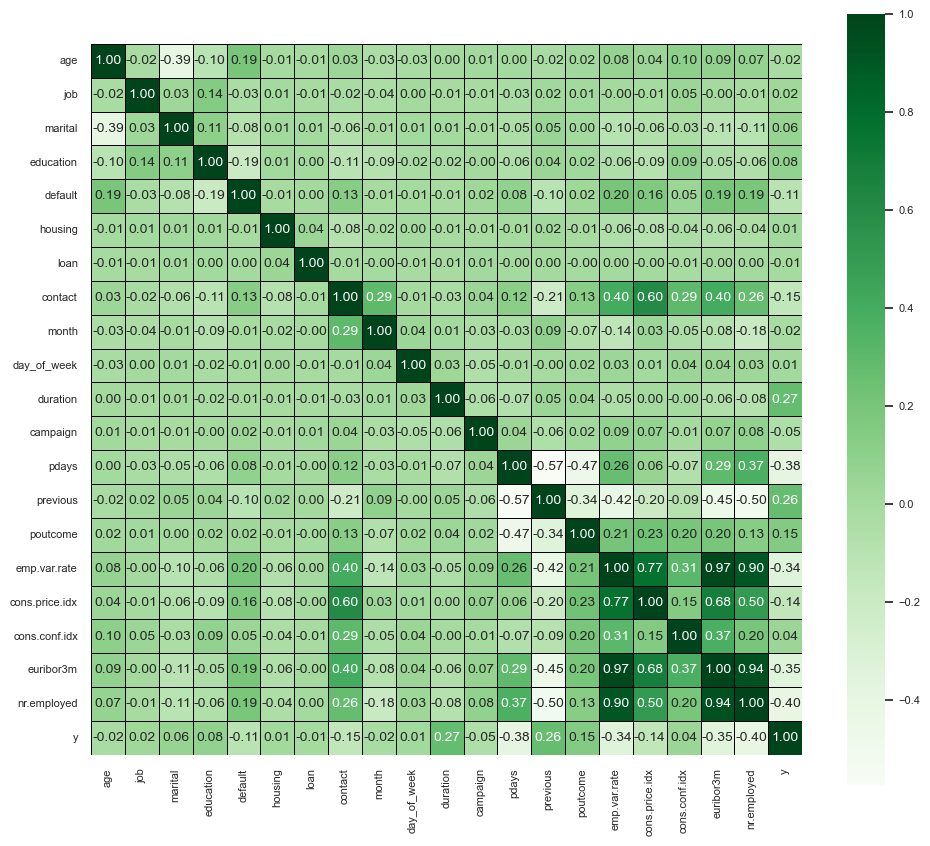

In [61]:
plt.rc('font', size=10)  
plt.rc('axes', titlesize=10)  
plt.rc('axes', labelsize=10)  
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True,linewidths=0.5, linecolor='black',fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.tight_layout()

**`Always 0.8 to 1 is Generally considered as the highest correlation in any analysis`**
>**`And < 0.5 is Low Correlation`**

So from the above heatmap there are No high or low correlation so we are going to use above method for feature selection

From above we can see that the right-buttom side we have lot of dark squares which is more correlation between columns
for example: corr between euribor3m and emp.var.rate, nr.employed and euribor3m , etc. but No strong corr between columns and target column y , so now we are using VIF to reduce this multicorreiliality.

> Basically we are removing features which are not important and keeping which are important

 <div class = "alert alert-block alert-info">
    <b> VIF - <code>Variance Inflation Factor</code> is being used to check how much multicollinearity is there in independent columns</b>

<b> Multicollinearity  -interdependencies between the Independent columns </b>

   <div class = "alert alert-block alert-success">
 <b>The VIF directly measures the ratio of the variance of the entire model to the variance of a model with only the feature in question </b>

>**`Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset.`**

(variables can be columns)
>**`Multicolinearity is the state where two or More variables are highly correlated. On the other hand it is more troublesome to detect because it emerges when three or more variables`**

**https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b**

**https://etav.github.io/python/vif_factor_python.html**

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
X=df.drop('y',axis=1)
y=df['y']


In [64]:
X.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0


In [65]:
variance_inflation_factor(df.values,0)

22.11469550068186

In [66]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
19,nr.employed,43115.201160
16,cons.price.idx,37885.320838
18,euribor3m,322.672944
12,pdays,174.895512
17,cons.conf.idx,143.576459
15,emp.var.rate,37.592081
14,poutcome,34.934345
0,age,22.113993
8,month,6.685085
13,previous,6.070087


<div class="alert alert-block alert-info">
    <b>
        Since the <code>nr.employed</code> column has the highest multicollinearity, we should remove this column first. 
        It's important to remove columns with high multicollinearity in a 
        <div class="alert alert-block alert-warning">
            <b>one-by-one manner</b>
        </div> 
        instead of all at once. Removing columns individually helps reduce multicollinearity among other columns, as removing one highly collinear column can affect the relationships between remaining columns.(becuase if we remove any highest column there might be chance that we might reduce Multicolinearity among other columns.)
    </b>
</div>



>* **VIF ***`< 5:`***   `Acceptable level`of multicollinearity.**
>* **VIF between ***`5 and 10`***:   `Moderate multicollinearity`. This could still be acceptable, but further investigation is recommended**
>* **VIF ***`> 10`:   `High multicollinearity`***. In most cases, a VIF above 10 suggests that the variable is highly collinear with others and may need to be removed to improve model stability.**

In [67]:
X.drop('nr.employed',axis=1,inplace=True)

In [68]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
16,cons.price.idx,729.560618
12,pdays,174.850562
18,euribor3m,130.883838
17,cons.conf.idx,124.902304
14,poutcome,34.669168
15,emp.var.rate,22.287122
0,age,22.107715
13,previous,5.973295
8,month,5.784547
2,marital,5.689362


`So now by just removing 'nr.employed' column we can see that we have signigicantly reduced the Multicolinearity amoung the columns`

In [69]:
X.drop('cons.price.idx',axis=1,inplace=True)

In [70]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
12,pdays,95.504094
17,euribor3m,93.815501
16,cons.conf.idx,82.695453
0,age,20.980560
14,poutcome,17.519163
15,emp.var.rate,16.710516
8,month,5.726141
2,marital,5.544426
3,education,4.503309
11,campaign,3.585901


In [71]:
X.drop('pdays',axis=1,inplace=True)

In [72]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
16,euribor3m,63.941291
15,cons.conf.idx,42.662876
0,age,20.156176
14,emp.var.rate,12.914012
13,poutcome,8.132807
8,month,5.664673
2,marital,5.426164
3,education,4.449798
11,campaign,3.566503
10,duration,3.184520


In [73]:
X.drop('euribor3m',axis=1,inplace=True)

In [74]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
15,cons.conf.idx,32.081295
0,age,17.204219
13,poutcome,8.004800
8,month,5.270616
2,marital,5.226350
3,education,4.292137
11,campaign,3.560596
10,duration,3.177169
9,day_of_week,3.032416
7,contact,2.266725


In [75]:
X.drop('cons.conf.idx',axis=1,inplace=True)

In [76]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
0,age,11.058997
13,poutcome,7.682693
8,month,4.871672
2,marital,4.372058
3,education,4.193335
11,campaign,3.394175
10,duration,3.105927
9,day_of_week,2.969072
7,contact,2.242675
5,housing,2.162435


In [77]:
X.drop('age',axis=1,inplace=True)

In [78]:
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
12,poutcome,6.538761
7,month,4.605944
1,marital,4.351772
2,education,4.013198
10,campaign,3.194073
9,duration,2.988925
8,day_of_week,2.888478
6,contact,2.241469
4,housing,2.112544
0,job,2.053348


In [79]:
X.drop('poutcome',axis=1,inplace=True)

vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['Multicolinearity']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=vif_data.sort_values(by='Multicolinearity',ascending=False)

vif_data.style.background_gradient(subset=['Multicolinearity'], cmap='Greens')

,feature,Multicolinearity
7,month,4.490123
1,marital,4.135585
2,education,3.788774
10,campaign,3.069132
9,duration,2.834777
8,day_of_week,2.803667
6,contact,2.225619
4,housing,2.080645
0,job,2.034164
12,emp.var.rate,1.522988


    Now since all the columns have Multicolinearity <= 5 we can proceed further. Hence feature selection task is DOne

In [80]:
X.head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1


### Model Building

1. splitting data into training and testing
2. defining a model
3. training a model
4. testing a model
5. Evaluation of performance of model

In [81]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=45)

In [82]:
Xtrain

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
26222,4,1,6,0,2,0,0,7,2,186.0,1.0,0.0,-0.1
26796,9,1,5,0,2,0,0,7,2,144.0,2.0,0.0,-0.1
33516,9,2,6,0,2,2,0,6,3,181.0,2.0,1.0,-1.8
18245,0,2,3,0,0,0,0,3,4,251.0,3.0,0.0,1.4
36320,7,1,7,0,2,0,0,4,3,327.0,1.0,0.0,-2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37486,4,1,6,0,2,0,0,1,2,328.0,2.0,0.0,-2.9
19199,9,2,6,0,2,2,0,1,4,455.0,3.0,0.0,1.4
14896,7,1,3,0,2,0,0,3,4,254.0,2.0,0.0,1.4
6764,2,1,7,0,2,0,1,6,4,126.0,2.0,0.0,1.1


In [83]:
ytrain

26222    0
26796    0
33516    0
18245    0
36320    0
        ..
37486    0
19199    1
14896    0
6764     0
7400     0
Name: y, Length: 24615, dtype: int32

In [84]:
ytest

7025     0
3927     0
26426    0
31790    0
14772    0
        ..
29626    0
1210     0
19796    0
38862    1
4247     0
Name: y, Length: 10550, dtype: int32

In [85]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [86]:
model.fit(Xtrain,ytrain)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
predict=model.predict(Xtest)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
ytest

7025     0
3927     0
26426    0
31790    0
14772    0
        ..
29626    0
1210     0
19796    0
38862    1
4247     0
Name: y, Length: 10550, dtype: int32

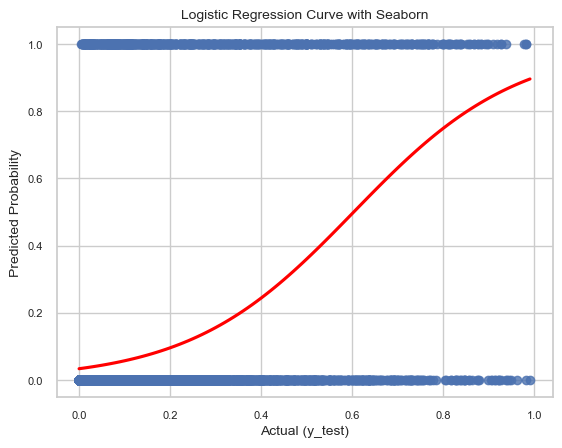

In [89]:

y_prob = model.predict_proba(Xtest)[:, 1]

sns.regplot(x=y_prob, y=ytest, logistic=True, ci=None, line_kws={"color": "red"})
plt.xlabel("Actual (y_test)")
plt.ylabel("Predicted Probability")
plt.title("Logistic Regression Curve with Seaborn")
plt.show()

In [90]:
from sklearn.metrics import *

accuracy_score(ytest,predict)*100

91.87677725118483

### Confusion Matrix
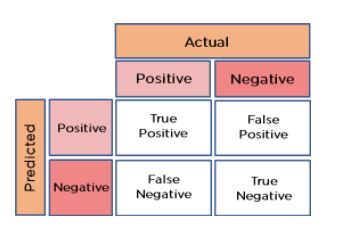

<div class="alert alert-block alert-success">
    <b>
      * <code> True Positive:</code> The number of times our actual positive values are equal to the predicted positive. You predicted a positive value, and it is correct.
    <br>
    * <code>False Positive:</code> The number of times our model wrongly predicts negative values as positives. You predicted a negative value, and it is actually positive.
        <br>
    * <code>True Negative</code>: The number of times our actual negative values are equal to predicted negative values. You predicted a negative value, and it is actually negative.
            <br>
    * <code>False Negative:</code> The number of times our model wrongly predicts negative values as positives. You predicted a negative value, and it is actually positive. 
        </b>
 </div>

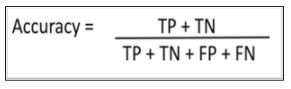

In [92]:
cm=confusion_matrix(ytest,predict)

In [93]:
cm

array([[9505,  233],
       [ 624,  188]], dtype=int64)

<Axes: >

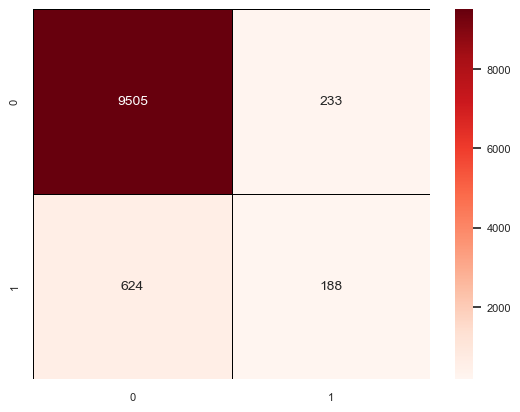

In [107]:
sns.heatmap(cm,annot=True,cmap="Reds",fmt='d',linewidths=0.5,linecolor='black')

In [135]:
print('Confusion matrix\n\n' , cm)

print('\nTrue Positives(TP) (The count of clients correctly predicted who are not interested in the scheme)  = ', cm[0,0])

print('\nTrue Negatives(TN)  (The count of clients correctly predicted who are interested in the scheme) = ', cm[1,1])

print('\nFalse Positives(FP)  (The count of clients wrongly predicted who are not interested in the scheme) = ', cm[0,1])

print('\nFalse Negatives(FN)  (The count of clients wrongly predicted who are interested in the scheme) = ', cm[1,0])

Confusion matrix

 [[9505  233]
 [ 624  188]]

True Positives(TP) (The count of clients correctly predicted who are not interested in the scheme)  =  9505

True Negatives(TN)  (The count of clients correctly predicted who are interested in the scheme) =  188

False Positives(FP)  (The count of clients wrongly predicted who are not interested in the scheme) =  233

False Negatives(FN)  (The count of clients wrongly predicted who are interested in the scheme) =  624


The confusion matrix shows `9505  + 188 = 9693 correct predictions` and `233 + 624 = 857 incorrect predictions`.

#### Accuracy

In [118]:
Accuracy =(cm[0,0]+cm[1,1])/sum(np.array(cm).flatten())
Accuracy*100

91.87677725118483